# Séries de Fourier de tempo contínuo

Renato Naville Watanabe

## Preparação do ambiente



In [1]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from sympy.plotting import PlotGrid
%matplotlib widget

## Motivação

Como visto anteriormente os sinais do tipo:

$x(t) = e^{j\omega t}$

são autofunções de sistemas lineares e invariantes no tempo. Ou seja, a saída de um sistema linear e invariante no tempo para essa entrada é:

$y(t) = H(j\omega)e^{j\omega t}$

em que $H(j\omega)$ é o valor da resposta em frequência do sistema para a frequência angular $\omega$.

Isso faz com que seja interessante descrever um sinal qualquer como uma combinação linear de exponenciais complexas. 

Um tipo de sinal que já vimos ser uma combinação linear de exponenciais complexas é o cosseno:

$\cos(\omega t) = \frac{e^{j\omega t}+ e^{-j\omega t}}{2}$

Em 1807, Joseph Fourier apresentou um método para representar qualquer sinal periódico como uma combinação linear de exponenciais complexas harmonicamente relacionadas.

## Exponenciais complexas harmonicamente relacionadas

Exponenciais harmonicamente relacionadas $\phi_k(t)$ são exponenciais complexas que têm um período $T$ em comum (o termo "harmônico" tem o mesmo significado do empregado em música). Ou seja, são sinais com frequências que são múltiplas da menor frequência encontrada entre os sinais.

$\phi_k(t) = A_ke^{jk\omega_0 t}, k = 0,\pm 1,\pm 2 ...$

Para $k = 0$ o sinal é uma constante e para os outros valores de $k$ a frequência angular do sinal  é $|k|\omega_0$. O período fundamental de um sinal que seja a soma dessas exponenciais harmônicas é:

$T_0 = \frac{2\pi}{\omega_0}$

Os componentes para $k = N$ e $k = -N$ são chamados de N-ésima harmônica. Os componentes para $k=1$ e $k=-1$ são as harmônicas fundamentais.



---

### Exemplo 1

O sinal:

$x(t) = e^{j0t} + e^{j2t} + e^{-j2t} + 2e^{j6t} + 2e^{-j6t} =1 + 0.5\cos(2t) + \cos(6t)$




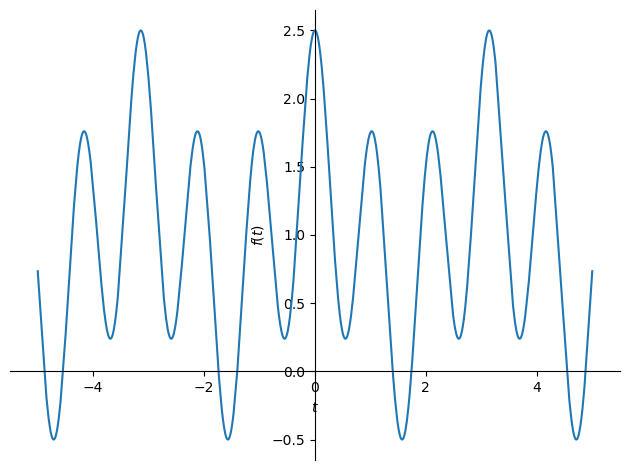

In [6]:
t = sym.symbols('t')
x = 1 + 0.5*sym.cos(2*t) + sym.cos(6*t)
sym.plot(x, (t, -5, 5));

A frequência fundamental é $\omega=2 rad/s$. Com isso o período fundamental é $\pi$ s. De fato, pelo gráfico, o sinal se repete a cada $\pi$ s.

---

Repare também que os coeficientes que multiplicam as exponenciais complexas são números reais. Isso não é obrigatório. Os coeficientes podem ser números complexos também. Porém, para que seja possível reconstruir um cosseno, é necessário que os coeficientes que multiplicam as exponenciais conjugadas uma da outra sejam também complexos conjugados.



---

### Exemplo 2

Considere agora o seguinte sinal:

$x(t) = e^{j0t} + e^{-j\frac{\pi}{3}}e^{j2 t} + e^{j\frac{\pi}{3}}e^{-j2 t} + e^{-j\frac{\pi}{2}}e^{j6 t}+2e^{j\frac{\pi}{2}}e^{-j6 t} = 1 + \cos(2 t - \frac{\pi}{3}) + 2\cos(6 t - \frac{\pi}{2})$

Como é possível observar, quando os coeficientes de cada exponencial complexa são complexos, a fase do cosseno resultante se altera.


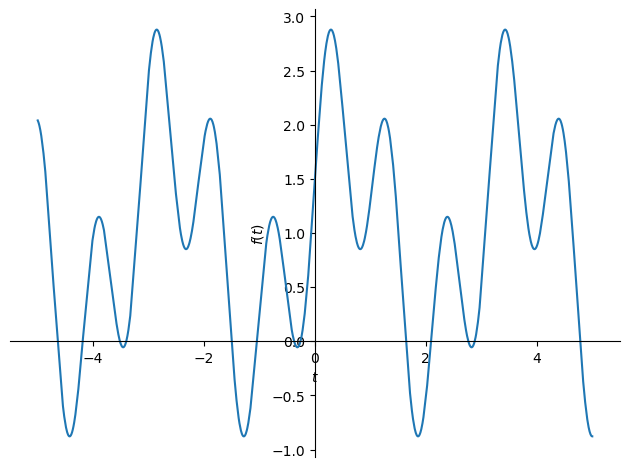

In [10]:
t = sym.symbols('t')
x = 1 + sym.cos(2*t-sym.pi/3) + sym.cos(6*t-sym.pi/2)
sym.plot(x, (t, -5,5));

Isso faz com que o sinal resultante da combinação linear das mesmas exponenenciais complexas seja diferente da do exemplo 1.

## Representação gráfica da magnitude e fase dos coeficientes 

Uma maneira muito comum de representar os coeficientes é de maneira gráfica, com o valor da harmônica na abscissa e o módulo do coeficiente em um gráfico e a fase do coeficiente em outro gráfico.

---

### Exemplo 3

Vamos representar os coeficientes do exemplo 2 de forma gráfica. A harmônica fundamental é $\omega = 2 $ rad/s. Então seus coeficientes estarão em $k=\pm 1$. A constante é $k=0$ e o cosseno de frequência angula 6 rad/s é $k=\pm 3$.



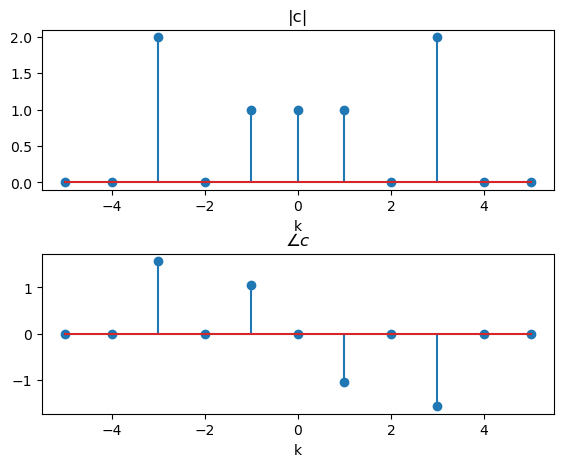

In [21]:
k = np.arange(-5,6,1)
cmod = np.zeros(len(k))
cfase = np.zeros(len(k))

cmod[k==0] = 1
cfase[k==0] = 0

cmod[k==1] = 1
cfase[k==1] = -np.pi/3

cmod[k==-1] = 1
cfase[k==-1] = np.pi/3

cmod[k==3] = 2
cfase[k==3] = -np.pi/2

cmod[k==-3] = 2
cfase[k==-3] = np.pi/2


plt.figure()
plt.subplot(2,1,1)
plt.stem(k, cmod)
plt.xlabel('k')
plt.title('|c|')
plt.subplot(2,1,2)
plt.stem(k, cfase)
plt.xlabel('k')
plt.title(r'$\angle c$')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=1,
                    hspace=0.4)
plt.show()

---

Repare que o gráfico do módulo dos coeficientes é uma função par e o gráfico da fase dos coeficientes é uma função ímpar. Isso sempre vai acontecer com sinais reais.

## Determinação dos coeficientes multiplicando cada harmônica

Supondo que um sinal periódico qualquer possa ser decomposto em uma soma de exponenciais complexas, quais são os coeficientes que multiplicam cada exponencial complexa. É isso que o método desenvolvido por Joseph Fourier respondeu e hoje é conhecido como **série de Fourier**.

Vamos supor que um sinal periódico $x(t)$ possa ser decomposto em soma de exponenciais complexas. Nesse caso, $x(t)$ pode escrito como:

$\boxed{x(t) = \displaystyle\sum_{k=-\infty}^\infty c_ke^{jk2\pi f_0 t}}$

Essa expressão é conhecida como **síntese** do sinal $x(t)$.

em que $f_0$ é a frequência fundamental do sinal.

O objetivo aqui é encontrar o valor de $c_k$, para todo $k$. Para isso, vamos multiplicar ambos os lados por $e^{jn2\pi f_0 t}$:

$x(t)e^{-jn2\pi f_0 t} = \displaystyle\sum_{k=-\infty}^\infty c_ke^{jk2\pi f_0 t}e^{-jn2\pi f_0 t} \rightarrow x(t)e^{-jn2\pi f_0 t} = \displaystyle\sum_{k=-\infty}^\infty c_ke^{j(k-n)2\pi f_0 t}$

Como $x(t)$ periódico, com um período $T = \frac{1}{f_0}$, vamos integrar ambos os lados da igualdade por um período $T$ do sinal:

$\int_T x(t)e^{-jn2\pi f_0 t}\,dt = \int_T\displaystyle\sum_{k=-\infty}^\infty c_ke^{j(k-n)2\pi f_0 t}\,dt$

Como a variável de integração é diferente da somatória, podemos mudar a ordem em que a somatória e a integral aparecem:

$\int_T x(t)e^{-jn2\pi f_0 t}\,dt = \displaystyle\sum_{k=-\infty}^\infty c_k\int_Te^{j(k-n)2\pi f_0 t}\,dt$


A integral do lado direito pode ser analisada em duas situações diferentes. A primeira, quando $k\neq n$,  está integrando em um período do sinal:

 $\int_T e^{j(k-n)2\pi f_0 t}\,dt = \left.\frac{e^{j(k-n)2\pi f_0 t}}{j(k-n)2\pi f_0 }\right|_{t=0}^T = 0$


A segunda situação, quando $n = k$:

$\int_T e^{j(k-n)2\pi f_0 t}\,dt = \int_T \,dt = T$

Então, a integral do lado direito da igualdade só vai ser diferente de zero quando $k=n$. Então:

$\int_T x(t)e^{-jn2\pi f_0 t}\,dt =  c_nT$

Com isso, o coeficiente $c_n$ pode ser obtido por:

$\boxed{c_n = \frac{1}{T}\int_T x(t)e^{-jn2\pi f_0 t}\,dt}$

Essa expressão é conhecida como **análise** do sinal $x(t)$.

Perceba que o coeficiente $c_0$ corresponde à média do sinal $x(t)$. 

$c_0 = \frac{1}{T}\int_T x(t)\,dt$

O valor de $c_0$ é comumente chamado de **valor DC** (direct current) ou **offset** do sinal.

A série de Fourier é representada pelo operador $\mathcal{SF}$:

$\mathcal{SF}(x(t)) = c_n$

### Exemplo 3

Vamos calcular os coeficientes da série de Fourier da onda quadrada com período $T=2$ s mostrada no gráfico abaixo:

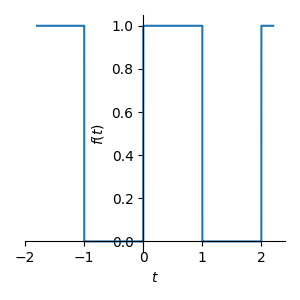

In [16]:
t = sym.symbols('t')
x = sym.Piecewise((1, (t>0)&(t<1)),
                  (1, (t>-2)&(t<-1)),
                  (1, (t>2)&(t<3)),
                  (0, True))
sym.plot(x, (t, -1.8,2.2), size=(3,3));

Vamos obter os coeficientes $c_n$ da série de Fourier:

$c_n = \frac{1}{T}\int_T x(t)e^{-jn\pi t}\,dt = 0.5\int_{0}^{1} e^{-jn\pi t}\,dt = \left.0.5\frac{e^{-jn\pi t}}{-jn\pi }\right|_{t=0}^{1} = 0.5\left(\frac{e^{-jn\pi}-1}{-jn\pi} \right) = 0.5\left(\frac{e^{jn\frac{\pi}{2}}-e^{-jn\frac{\pi}{2}}}{jn\pi} \right)e^{-jn\frac{\pi}{2}}=\frac{e^{-jn\frac{\pi}{2}}}{n\pi}\mathrm{sen}\left(n\frac{\pi}{2}\right)$

Quando $n=0$ essa expressão não é definida. Então vamos calcular separadamente $c_0$:

$c_0=0.5\int_{-0.5}^{0.5} \,dt = 0.5$





O gráfico do módulo e fase dos coeficientes da série quadrada é:

/tmp/ipykernel_21652/3304541964.py:2: RuntimeWarning: invalid value encountered in divide
  c = np.sin(np.pi/2*n)/(n*np.pi)*np.exp(-1j*n*np.pi/2)


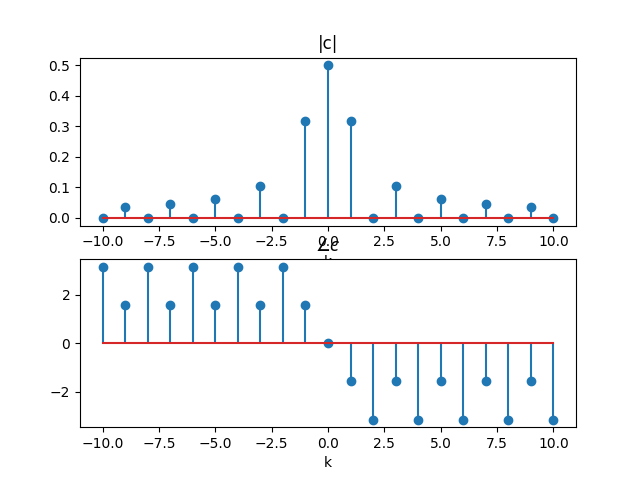

In [18]:
n = np.arange(-10,11)
c = np.sin(np.pi/2*n)/(n*np.pi)*np.exp(-1j*n*np.pi/2)
c[n==0] = 0.5
plt.figure()
plt.subplot(2,1,1)
plt.stem(n, np.abs(c))
plt.xlabel('k')
plt.title('|c|')
plt.subplot(2,1,2)
plt.stem(n, np.angle(c))
plt.xlabel('k')
plt.title(r'$\angle c$')
plt.subplots_adjust(wspace=1)
plt.show()

## Propriedades da série de Fourier

- **Linearidade**

  Se $\mathcal{SF}(x_1(t)) = a_n$ e $\mathcal{SF}(x_2(t)) = b_n$

  Então:

  $\boxed{\mathcal{SF}(Ax_1(t)+Bx_2(t)) = Aa_n+Bb_n}$

- **Deslocamento no tempo**

  Se $\mathcal{SF}(x(t)) = a_n$

  Então:

  $\boxed{\mathcal{SF}(x(t-t_0)) = e^{-jn\omega_0 t_0}a_n}$

- **Reflexão no tempo**

  Se $\mathcal{SF}(x(t)) = a_n$

  Então:

  $\boxed{\mathcal{SF}(x(-t)) = a_{-n}}$


  

---
### Exemplo  4


Considere agora a onda triangular com período $T=2$ s:

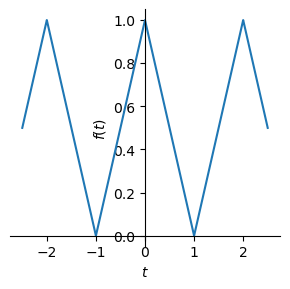

In [47]:
t = sym.symbols('t')
x = sym.Piecewise((t+1, (t>=-1)&(t<0)),
                  (-t+1, (t>=0)&(t<1)),
                  ((t-2)+1, (t>=1)&(t<2)),
                  ((-t-2)+1, (t>=-2)&(t<-1)),
                  ((-t+2)+1, (t>=2)&(t<3)),
                  ((t+2)+1, (t>=-3)&(t<-2)),
                  (0, True))
sym.plot(x, (t, -2.5,2.5), size=(3,3));

Vamos agora calcular os coeficientes $c_n$ da série de Fourier deste sinal. É um sinal triangular. Podemos ver que a parte do sinal de -1 a 0 segundos é o sinal de 0 a 1 segundo espelhado. Então podemos calcular a série de Fourier do sinal $x_1(t) = x(t)$ para $0\leq t \leq 1$. A série de fourier de $x(t)$ será $b_n = a_n + a_{-n}$ ($a_n$ sendo a série de Fourier de $x_1(t)$), pelas propriedades da linearidade e da reflexão no tempo.

Então, vamos calcular $a_n$:

$a_n = 0.5\int_0^1 (-t+1)e^{-jn\pi t}\,dt = 0.5\left.(-t+1)\frac{e^{-jn\pi t}}{-jn\pi}\right|_{t=0}^1 - 0.5\int_{0}^1-\frac{e^{-jn\pi t}}{-jn\pi}\,dt = -\frac{1}{jn\pi} - \left.\frac{e^{-jn\pi t}}{n^2\pi^2}\right|_{t=0}^1$

$a_n = -\frac{1}{2jn\pi} - (\frac{e^{-jn\pi}-1}{2n^2\pi^2}) = -\frac{1}{2jn\pi} + (1-\frac{e^{-jn\pi}}{2n^2\pi^2})$

Então, a série de Fourier do sinal $x(t)$ é:

$b_n =  a_n + a_{-n} = -\frac{1}{2jn\pi} + (1-\frac{e^{-jn\pi}}{2n^2\pi^2}) + \frac{1}{2jn\pi} + (1-\frac{e^{jn\pi}}{2n^2\pi^2}) =  (1-\frac{e^{-jn\pi}}{2n^2\pi^2})  + (1-\frac{e^{jn\pi}}{2n^2\pi^2}) = \frac{1-\cos(n\pi)}{n^2\pi^2}$


Abaixo está o gráfico do módulo e da fase dos coecientes do sinal $x(t)$.

/tmp/ipykernel_1042892/3235698947.py:2: RuntimeWarning: invalid value encountered in divide
  c = (1-np.cos(np.pi*n))/(n**2*np.pi**2)


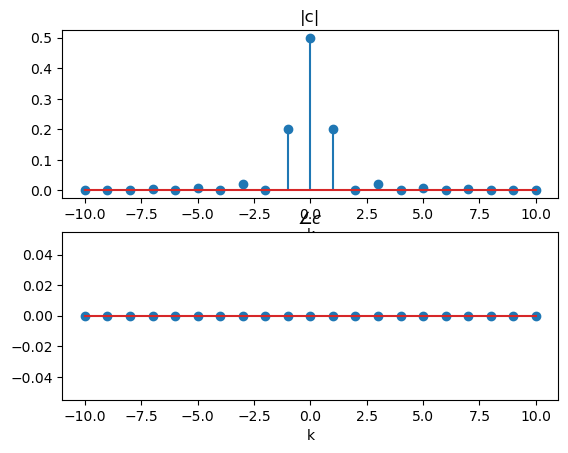

In [14]:
n = np.arange(-10,11)
c = (1-np.cos(np.pi*n))/(n**2*np.pi**2)
c[n==0] = 0.5
plt.figure()
plt.subplot(2,1,1)
plt.stem(n, np.abs(c))
plt.xlabel('k')
plt.title('|c|')
plt.subplot(2,1,2)
plt.stem(n, np.angle(c))
plt.xlabel('k')
plt.title(r'$\angle c$')
plt.subplots_adjust(wspace=1)
plt.show()

---

---

### Exemplo 5

Vamos considerar agora a onda triangular vista no gráfico abaixo


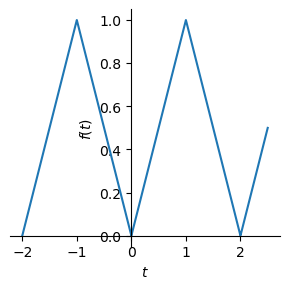

In [13]:
t = sym.symbols('t')
x = sym.Piecewise(((t-1)+1, (t>=0)&(t<1)),
                  (-(t-1)+1, (t>=1)&(t<2)),
                  (((t-1)-2)+1, (t>=2)&(t<3)),
                  ((-(t-1)-2)+1, (t>=-1)&(t<0)),
                  ((-(t-1)+2)+1, (t>=3)&(t<4)),
                  (((t-1)+2)+1, (t>=-2)&(t<-1)),
                  (0, True))
sym.plot(x, (t, -2,2.5), size=(3,3));

Esse sinal é igual ao sinal do exemplo 4, porém deslocada de 1 segundo no tempo. Então, vamos usar a propriedade do deslocamento no tempo.

$c_k = b_ke^{-jk\pi 1} = \frac{1-\cos(n\pi)}{n^2\pi^2}e^{-jk\pi} $

O módulo e fase dos coeficientes neste caso são mostrados abaixo.

/tmp/ipykernel_1042892/1747543474.py:2: RuntimeWarning: invalid value encountered in divide
  c = (1-np.cos(np.pi*n))/(n**2*np.pi**2)*np.exp(-1j*n*np.pi)


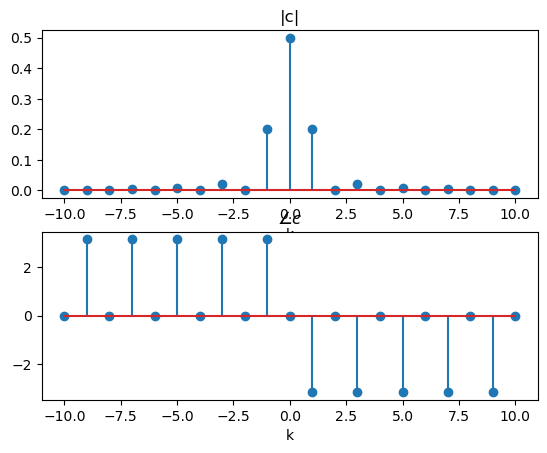

In [18]:
n = np.arange(-10,11)
c = (1-np.cos(np.pi*n))/(n**2*np.pi**2)*np.exp(-1j*n*np.pi)
c[n==0] = 0.5
plt.figure()
plt.subplot(2,1,1)
plt.stem(n, np.abs(c))
plt.xlabel('k')
plt.title('|c|')
plt.subplot(2,1,2)
plt.stem(n, np.angle(c))
plt.xlabel('k')
plt.title(r'$\angle c$')
plt.subplots_adjust(wspace=1.5)
plt.show()

## Teorema de Parseval

O teorema de Parseval diz que a potência do sinal é igual à soma dos quadrados dos módulos dos coeficientes da série de Fourier.

$\frac{1}{T}\int_T|x(t)|^2\,dt = \sum_{k=-\infty}^\infty|a_k|^2$

A demonstração fica como exercício.

## Reconstrução do sinal

Para reconstruir o sinal $x(t)$ a partir dos coeficientes de Fourier, basta usar a expressão de síntese do sinal $x(t)$.

$x(t) = \displaystyle\sum_{k=-\infty}^{\infty}a_ke^{jk\omega_0 t}$

Na prática, não conseguimos fazer essa soma até infinito. Então escolhemos um valor finito para realizar a soma acima. Quanto maior o número de termos, mais próximo do sinal original fica a reconstrução.

--- 

###  Exemplo 6

Vamos reconstruir o sinal triangular do exemplo 4. Os coeficientes da série de Fourier são dados pela seguinte expressão:

$c_n = \frac{1-\cos(n\pi)}{n^2\pi^2}$, com $n\neq 0$

e 

$c_0 = 0.5$

Então a reconstrução do sinal $x(t)$ fica:

$x(t) = \displaystyle\sum_{k=-\infty}^\infty c_ke^{jk\pi t}$

Abaixo está o sinal reconstruído com diferentes números de termos.



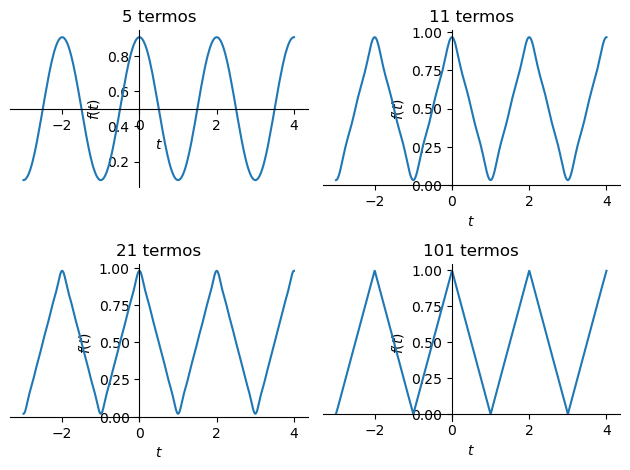

In [26]:
t = sym.symbols('t')

M = [2, 5, 10, 50]
p = dict()
for i in range(len(M)):
    x = 0*t
    for k in range(-M[i], M[i]+1):
        if k != 0:
            c = (1 - np.cos(np.pi*k))/(k**2*np.pi**2)
        else:
            c = 0.5
        x = x + c*sym.exp(sym.I*k*sym.pi*t)

    p[i] = sym.plot(x, (t, -3, 4), show=False, title=str(2*M[i]+1)+' termos')
PlotGrid(2, 2, p[0], p[1], p[2], p[3]);


Quanto maior o número de termos, melhor é a reconstrução.

## Séries de Fourier como entrada de um sistema linear e invariante no tempo

Como já visto anteriormente se um sinal $x(t) = e^{j\omega t}$ é usado como entrada de um sistema linear e invariante no tempo com resposta em frequência $H(j\omega)$, então sua saída será:

$y(t) = H(j\omega)e^{j\omega t}$

Então ao expressar um sinal periódico como uma série de Fourier:

$x(t) = \displaystyle\sum_{k=-\infty}^\infty c_ne^{jk\omega_0t}$

a sua saída será:

$y(t) = \displaystyle\sum_{k=-\infty}^\infty c_kH(jk\omega_0)e^{jk\omega_0t}$


---

### Exemplo 7

Um sistema linear e invariante no tempo é um **filtro-ideal**, com a seguinte resposta em frequência:

$H(j\omega) = \left\{\begin{array}{cc}1& ,|\omega|< 8 \text{ rad/s} \\0& \text{, c.c.} \end{array}\right.$

Um filtro-ideal é um sistema que tem ganho 1 até uma determinada frequência $\omega_c$ e ganho 0 para frequências maiores do que $\omega_c$.

Um onda quadrada com período 2 s e valor 1 entre 0 e 1 segundos e valor 0 entre 1 e 2 segundos é usada como sinal de entrada. Esse sinal tem os seguintes coeficientes da série de Fourier (veja exemplo 3):

$c_k = \frac{e^{-jk\frac{\pi}{2}}}{k\pi}\mathrm{sen}\left(k\frac{\pi}{2}\right)$ e $c_0=0,5$.

A frequência fundamental desse sinal é $\omega_0 = \pi$ rad/s.

Então, a saída desse sistema para a onda quadrada como entrada é:

$y(t)=\displaystyle\sum_{k=-\infty}^\infty c_kH(jk\omega_0)e^{jk\omega_0t}$

Para $k = 3$, a frequência correspondente é $\omega = 3\omega_0 = 3\pi> 8$. Para frequências acima de $8$ rad/s, $H(j\omega) = 0$. Então, a saída fica:

$y(t) = \displaystyle\sum_{k=-2}^2 c_kH(jk\omega_0)e^{jk\omega_0t} = \frac{e^{j2\frac{\pi}{2}}}{-2\pi}\mathrm{sen}\left(-2\frac{\pi}{2}\right)e^{-j2\omega_0t}+\frac{e^{j\frac{\pi}{2}}}{-\pi}\mathrm{sen}\left(-\frac{\pi}{2}\right)e^{-j\omega_0t} + 0.5 + \frac{e^{-j\frac{\pi}{2}}}{\pi}\mathrm{sen}\left(\frac{\pi}{2}\right)e^{j\omega_0t} + \frac{e^{-2j\frac{\pi}{2}}}{2\pi}\mathrm{sen}\left(2\frac{\pi}{2}\right)e^{2j\omega_0t}$

$y(t) = \frac{e^{j\pi}}{-2\pi}\mathrm{sen}\left(-\pi\right)e^{-j2\omega_0t}+\frac{e^{j\frac{\pi}{2}}}{-\pi}\mathrm{sen}\left(-\frac{\pi}{2}\right)e^{-j\omega_0t} + 0.5 + \frac{e^{-j\frac{\pi}{2}}}{\pi}\mathrm{sen}\left(\frac{\pi}{2}\right)e^{j\omega_0t} + \frac{e^{-j\pi}}{2\pi}\mathrm{sen}\left(\pi\right)e^{2j\omega_0t} = \frac{e^{j\frac{\pi}{2}}}{-\pi}(-1)e^{-j\omega_0t} + 0.5 + \frac{e^{-j\frac{\pi}{2}}}{\pi}e^{j\omega_0t}$

$y(t) = 0.5+ \frac{2}{\pi}\cos(\pi t-\frac{\pi}{2})$



---

## Exercícios

**1)** Demonstre o teorema de Parseval.


**2)** Encontre os coeficientes da série de Fourier dos seguintes sinais:

a) 

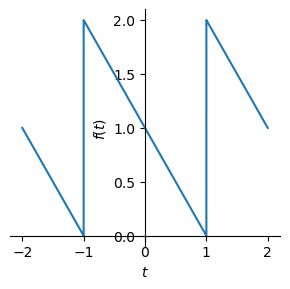

In [27]:
t = sym.symbols('t')
x = sym.Piecewise((-t+1, (t>-1)&(t<1)),
                  (-(t-2)+1, (t>-1)&(t<3)),
                  (-(t+2)+1, (t>-3)&(t<-1)),
                  (0, True))
sym.plot(x, (t, -2,2), size=(3,3));

b)

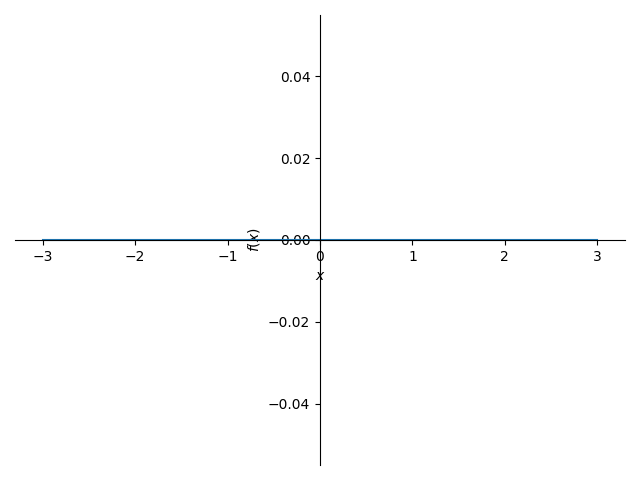

In [9]:
t = sym.symbols('t')
x = sym.Piecewise((0, True))
y = sym.symbols('y')
p1 = sym.plot(x, (t, -3, 3))
fig = p1._backend.fig
ax = p1._backend.ax[0]
ax.set_ylabel(r'$\delta(t)$')
ax.set_xlabel(r'$t$')
for i in range(-3,4):
    ax.arrow(i,0,0,1-0.1, width=0.03, head_width = 0.2, head_length=0.1)
fig.canvas.draw_idle()

c)

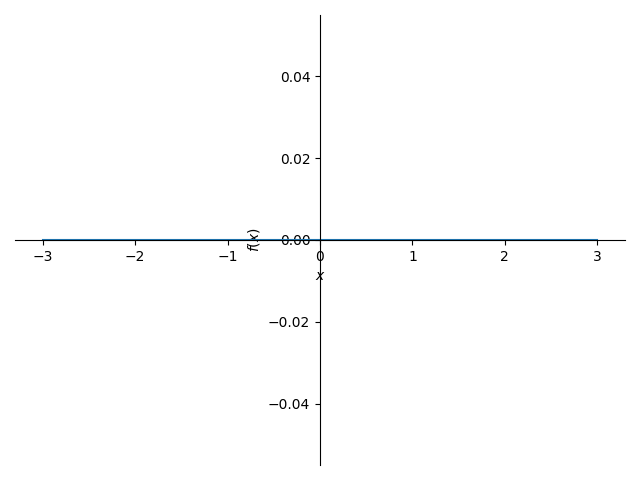

In [13]:
t = sym.symbols('t')
x = sym.Piecewise((0, True))
y = sym.symbols('y')
p1 = sym.plot(x, (t, -3, 3))
fig = p1._backend.fig
ax = p1._backend.ax[0]
ax.set_ylabel(r'$\delta(t)$')
ax.set_xlabel(r'$t$')
for i in range(-3,4):
    ax.arrow(i,0,0,1-0.1, width=0.03, head_width = 0.2, head_length=0.1)
    ax.arrow(i+0.5,0,0,-0.5+0.1, width=0.03, head_width = 0.2, head_length=0.1)
plt.ylim(-1,1)
fig.canvas.draw_idle()


**3)** Encontre os coeficientes da série de Fourier e a frequência fundamental dos seguintes sinais periódicos:

a) $x_1(t) = 3 + 2\cos(2\pi 3 t) + \cos(2\pi 6 t)$

b) $x_2(t) = \left\{\begin{array}{cc}1 & 0<t<1\\0&1\leq t < 2 \\ x_2(t-2)&\end{array}\right. $

c) $x_3(t) = \left\{\begin{array}{cc}\mathrm{sen}\left(\frac{2\pi}{3} t\right) & 0<t<3\\0&3\leq t < 6 \\ x_2(t-6)&\end{array}\right. $

d) $x_4(t) = \left\{\begin{array}{cc}\mathrm{sen}t & 0<t<2\\-t+4&2\leq t < 4 \\ x_2(t-4)&\end{array}\right. $

**4)** Um sistema linear e invariante no tempo tem a seguinte resposta em frequência:

$H(j\omega) = \frac{\mathrm{sen}(3\omega)}{\omega}$

É colocado o seguinte sinal como entrada:

$x(t) = \left\{\begin{array}{cc} 1 &, 0<t\leq 3\\-1 & 3<t\leq 6 \\x(t-6) \end{array}\right.$

## Referências


- Ulaby, FT e Yagle, AE, Signals & Systems: Theory and Applications, 2018, [ss2.eecs.umich.edu](ss2.eecs.umich.edu)
- Lathi, BP, Sinais e Sistemas Lineares, 2007
- Oppenheim, M.  e Willsky, S., Sistemas e Sinais, 2010